# Load modules

In [20]:
import numpy as np
import pandas as pd
from pipedream_solver.hydraulics import SuperLink
from pipedream_solver.simulation import Simulation
from pipedream_solver.nutils import interpolate_sample

import matplotlib.pyplot as plt
import seaborn as sns

import influxdb 
import pandas as pd
from dateutil import tz

# import the libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

import pandas as pd
import numpy as np
from pipedream_solver.hydraulics import SuperLink
from pipedream_solver.simulation import Simulation
import ast
import pandas as pd
import seaborn as sns
sns.set_palette('husl')

from datetime import datetime, timedelta


# Load pipedream model information 

In [2]:
superjunctions = pd.read_csv('../data/waller_superjunctions.csv', index_col=0)  
superlinks = pd.read_csv('../data/waller_creek_superlinks.csv', index_col=0) 
subbasins = pd.read_excel('../data/Waller_HMS_model_data.xlsx', sheet_name=0)

In [3]:
superlinks

,name,id.1,sj_0,sj_1,in_offset,out_offset,dx,n,shape,g1,g2,g3,g4,Q_0,h_0,ctrl,A_s,A_c,C
id,,,,,,,,,,,,,,,,,,,
0,R_WLR01,0,30,0,0.0,0.0,238.658400,0.040,Trapezoidal,3.0480,4.5720,1.874766,0.0,0.0,0.00001,False,1.0,0.0,0.0
1,R_WLR02,1,0,1,0.0,0.0,564.184800,0.060,Trapezoidal,3.0480,4.5720,1.874766,0.0,0.0,0.00001,False,1.0,0.0,0.0
2,R_WLR04,2,2,3,0.0,0.0,580.034400,0.060,Trapezoidal,3.0480,4.5720,1.874766,0.0,0.0,0.00001,False,1.0,0.0,0.0
3,R_WLR03,3,1,3,0.0,0.0,832.917868,0.050,Trapezoidal,3.0480,4.5720,1.874766,0.0,0.0,0.00001,False,1.0,0.0,0.0
4,R_WLR05,4,3,4,0.0,0.0,631.305780,0.050,Trapezoidal,3.0480,4.5720,1.874766,0.0,0.0,0.00001,False,1.0,0.0,0.0
5,R_WLR06,5,4,5,0.0,0.0,446.966267,0.050,Trapezoidal,2.4384,4.5720,2.099738,0.0,0.0,0.00001,False,1.0,0.0,0.0
6,R_WLR07,6,5,6,0.0,0.0,526.072766,0.050,Trapezoidal,2.4384,5.4864,2.386065,0.0,0.0,0.00001,False,1.0,0.0,0.0
7,R_HEM04,7,24,25,0.0,0.0,528.828000,0.015,Trapezoidal,2.4384,5.4864,4.374453,0.0,0.0,0.00001,False,1.0,0.0,0.0
8,R_HEM02,8,28,23,0.0,0.0,430.682400,0.015,Trapezoidal,2.4384,5.4864,4.374453,0.0,0.0,0.00001,False,1.0,0.0,0.0


# Specify simulation parameters

# Unit conversions
m_per_ft = 0.3048
ft_per_mi = 5280.
in_per_ft = 12.
s_per_min = 60
ns_per_s = 1e9

# Manual edits to model
superlinks.loc[21, ['g2', 'g3']] = 0., 7.777146367746631
superlinks['C_uk'] = 0.
superlinks['C_dk'] = 0.

# Manual edits to hydrology params
lag_time_adjust_ratio = 0.4
CN_adjust_ratio = 1.0

# Simulation params
sample_interval = 30
node_ids = ['Bridge1','Bridge2','Bridge3','Bridge4','Bridge5']
site_junction_name = 'J_WLR18_COMB_HEMP'
site_link_name = 'R_WLR16'
site_junction_index = 14
site_link_index = 21

# Define runoff functions

In [4]:
superjunctions

,name,id,z_inv,h_0,bc,storage,a,b,c,max_depth
0,J_WLR01_RR_S_OF_MORROW,0,220.133601,0.00001,False,functional,0.0,0.0,100.0,inf
1,J_WLR02_LAMAR,1,215.563704,0.00001,False,functional,0.0,0.0,100.0,inf
2,J_WLR03_TRIB_AT_SWANEE,2,211.506633,0.00001,False,functional,0.0,0.0,100.0,inf
3,J_WLR05_COMB_AT_HUNTLAND,3,205.822296,0.00001,False,functional,0.0,0.0,100.0,inf
4,J_WLR06_US_POND_REILLY,4,200.366376,0.00001,False,functional,0.0,0.0,100.0,inf
5,J_WLR07_KOENIG,5,196.397880,0.00001,False,functional,0.0,0.0,100.0,inf
6,J_WLR08_NORTH_LOOP,6,192.618360,0.00001,False,functional,0.0,0.0,100.0,inf
7,J_WLR09_51ST,7,190.853568,0.00001,False,functional,0.0,0.0,100.0,inf
8,J_WLR10_INTRAMURAL_FIELDS,8,186.827160,0.00001,False,functional,0.0,0.0,100.0,inf
9,J_WLR12_COMB_AT_DUVAL,9,180.024024,0.00001,False,functional,0.0,0.0,100.0,inf


In [23]:
from hydrology import scs_composite_CN, scs_excess_precipitation, scs_uh_runoff, precip_data, scs_excess_precipitation

# Load LCRA flow, depth, and precipitation data

In [6]:
# Add LCRA data (Flow, depth, and precipitation data for the 'Waller Creek at 23rd Street' gage from the LCRA site.)
LCRA_2022 = pd.read_excel('../data/LCRA_Export/LCRA_Export_2022.xlsx')
LCRA_2023 = pd.read_excel('../data/LCRA_Export/LCRA_Export_2023.xlsx')
LCRA=pd.concat([LCRA_2022[8:],LCRA_2023[8:]])
LCRA = LCRA.set_index('Site Name')
LCRA.index.name = 'Time'
# Handle timezone
LCRA = LCRA.tz_localize('US/Central', nonexistent='shift_forward').tz_convert('UTC')
# Rename columns to be more descriptive
LCRA = LCRA.rename(columns={'W3A' : 'depth__ft', 'W3A.1' : 'flow_rate__cfs', 'W3A.3' : 'precip_tot__in'})
LCRA = LCRA.drop('W3A.2', axis=1)
# Filter dataset to time period


In [7]:
forecast = pd.read_csv('precip__in_forecast.csv', index_col=0)

In [8]:
forecast.index = pd.to_datetime(pd.Series(forecast.index))
forecast = forecast.tz_localize('UTC')

# Load ultrasonic sensor data

In [9]:
# Visualizing the actual depth of Waller Creeks  

# set up the lists(node_id and length between node and bottom)
node_id_list=['Bridge1','Bridge2','Bridge3','Bridge4','Bridge5']
length_ntb_list =[3911.6, 3175, 4927.6, 4978.4, 3556]
ntb_df=pd.DataFrame(length_ntb_list, columns=['depth'])
ntb_df=ntb_df.set_index([node_id_list])

#set up the influxDBClient 
client_dict = {'host' : 'ec2-3-91-156-8.compute-1.amazonaws.com',
               'port' : 8086,
               'username' : 'generic_node',
               'password' : 'GlareShellTwilight',
               'database' : 'RAW'}

# Compute runoff into each superjunction

In [24]:
# Compute runoff into each superjunction
def Model_initialization(start_date,end_date,runoff__cms_prev,precip__in,subbasins,P_now_initial,loss_initial,Pe_prev = 0., decay_function=lambda x: 0.):
    
    keepGoing=True
    while keepGoing:
        try:
            Q_in = {}
            CNs = []
            
            # Manual edits to hydrology params
            lag_time_adjust_ratio = 1.0
            CN_adjust_ratio = 1.0


            # For each subbasin...
            for i in range(len(subbasins)):
                P_now = P_now_initial[i]
                loss=loss_initial[i]
                # Load subbasin parameters
                CN_C = subbasins['Curve Number'][i]
                A_Imp = subbasins['Impervious Percent'][i]
                area__sq_mi = subbasins['Area (mi2)'][i]
                downstream = subbasins['Downstream'][i]
                lag_time__min = subbasins['Lag Time'][i] * lag_time_adjust_ratio

                # Compute composite curve number
                CN = scs_composite_CN(CN_C, A_Imp) * CN_adjust_ratio
                CN = min(CN, 99)

                # Compute excess precipitation
                excess_precip_cum__in, excess_precip__in, P_now,Pe_prev,loss = scs_excess_precipitation(precip__in, CN,P_now,Pe_prev,loss,decay_function=decay_function)
                P_now_subbasins[i]=P_now
                loss_subbasins[i]=loss
                # Compute runoff using unit hydrograph
                runoff__cms_now = scs_uh_runoff(excess_precip__in, uh__dimless, area__sq_mi, sample_interval,lag_time__min)
                runoff__cms_prev[downstream]=runoff__cms_prev[downstream].fillna(0)
                
                runoff__cms=runoff__cms_now[:end_date].add(runoff__cms_prev[downstream],fill_value=0)
                
                
                
                Q_in[downstream] = runoff__cms

                runoff__cms_prev[downstream]=runoff__cms_now[end_date:]
                
                print('runoff__cms_now',runoff__cms_now)
                print('runoff__cms_prev',runoff__cms_prev[downstream])
                print('runoff__cms',runoff__cms)

            # Format flow input as DataFrame
            Q_in = pd.DataFrame.from_dict(Q_in)
            # Add flow input for missing sites
            Q_in['UPSTREAM_WALLER'] = Q_in['R_WLR01']
            Q_in['UPSTREAM_HEMPHILL'] = Q_in['R_HEM01']
            Q_in[[name for name in superjunctions['name'] if not name in Q_in.columns]] = 0.
            # Ensure flow input is only for superjunctions specified in table
            Q_in = Q_in[superjunctions['name'].tolist()]
            # Remove NaN values
            Q_in = Q_in.fillna(0.)
            # Copy flow input with original timestamps
            Q_in_orig = Q_in.copy()
            # Convert flow input index to integer index starting with zero
            Q_in.index = Q_in.index.astype(int) / 1e9
            Q_in.index -= Q_in.index.min()
            keepGoing=False
        
        except ValueError:
            keepGoing=True
        except KeyError :
            keepGoing=True
        except AssertionError:
            keepGoing=True


    return excess_precip__in,Q_in,P_now_subbasins,loss,runoff__cms_prev,Pe_prev


In [25]:
# Run simulation without KF
def Model_simulation(excess_precip__in,Q_in,dt,superlinks,superjunctions,load_data,delta):
    load_data=load_data
    keepGoing=True
    while keepGoing:
        try:


            superlink = SuperLink(superlinks, superjunctions,internal_links=30, mobile_elements=True)
            

            H_j = []
            h_Ik = []
            Q_uk = []
            Q_dk = []
            S1=[]
            S2=[]
            S3=[]
            S4=[]

            # Set constant timestep (in seconds)

            # Add constant baseflow
            baseflow = 0.35e-3 * np.ones(superlink._h_Ik.size)

            # Create simulation context manager
            with Simulation(superlink, Q_in=Q_in) as simulation:
                print(load_data)
                simulation.model.load_state(load_data)
                # While simulation time has not expired...
                simulation.t_end=delta
                
                while simulation.t <= simulation.t_end:
                    # Step model forward in time
                    simulation.step(dt=dt, num_iter=8, Q_Ik=baseflow)
                    simulation.model.reposition_junctions()
                    # Print progress bar
                    simulation.print_progress()
                    # Save states
                    H_j.append(simulation.model.H_j.copy())
                    h_Ik.append(simulation.model.h_Ik.copy())
                    Q_uk.append(simulation.model.Q_uk.copy())
                    Q_dk.append(simulation.model.Q_dk.copy())
                    S1.append(simulation.model.h_Ik[simulation.model._kI == 20][27].copy())
                    S2.append(simulation.model.h_Ik[simulation.model._kI == 21][15].copy())
                    S3.append(simulation.model.h_Ik[simulation.model._kI == 22][1].copy())
                    S4.append(simulation.model.h_Ik[simulation.model._kI == 22][15].copy())
                    
                    

            time_index = pd.date_range(start=excess_precip__in.index.min(), 
                                       periods=len(H_j), 
                                       freq=f'{dt}s')
            print(excess_precip__in.index.min())
            # Convert saved states to dataframes
            H_j = pd.DataFrame(np.vstack(H_j), index=time_index, columns=superjunctions['name'])
            h_Ik = pd.DataFrame(np.vstack(h_Ik), index=time_index)
            Q_uk = pd.DataFrame(np.vstack(Q_uk), index=time_index, columns=superlinks['name'])
            Q_dk = pd.DataFrame(np.vstack(Q_dk), index=time_index, columns=superlinks['name'])
            
            # Compute depth
            h_j = H_j - simulation.model._z_inv_j
            final_data=simulation.model.states
            
            
            keepGoing=False
        
        except ValueError:
            keepGoing=True
        except KeyError :
            keepGoing=True
        except AssertionError:
            keepGoing=True

    
    return H_j,h_Ik,Q_uk,Q_dk,h_j,final_data 

# Automatic figure graph

# Simulation 

In [59]:


## Load pipedream model information 
superjunctions = pd.read_csv('../data/waller_superjunctions.csv', index_col=0)  
superlinks = pd.read_csv('../data/waller_creek_superlinks.csv', index_col=0) 
subbasins = pd.read_csv('../data/Waller_HMS_model_data.csv', index_col=0)

superjunctions

,name,id,z_inv,h_0,bc,storage,a,b,c,max_depth
0,J_WLR01_RR_S_OF_MORROW,0,220.133601,0.00001,False,functional,0.0,0.0,100.0,inf
1,J_WLR02_LAMAR,1,215.563704,0.00001,False,functional,0.0,0.0,100.0,inf
2,J_WLR03_TRIB_AT_SWANEE,2,211.506633,0.00001,False,functional,0.0,0.0,100.0,inf
3,J_WLR05_COMB_AT_HUNTLAND,3,205.822296,0.00001,False,functional,0.0,0.0,100.0,inf
4,J_WLR06_US_POND_REILLY,4,200.366376,0.00001,False,functional,0.0,0.0,100.0,inf
5,J_WLR07_KOENIG,5,196.397880,0.00001,False,functional,0.0,0.0,100.0,inf
6,J_WLR08_NORTH_LOOP,6,192.618360,0.00001,False,functional,0.0,0.0,100.0,inf
7,J_WLR09_51ST,7,190.853568,0.00001,False,functional,0.0,0.0,100.0,inf
8,J_WLR10_INTRAMURAL_FIELDS,8,186.827160,0.00001,False,functional,0.0,0.0,100.0,inf
9,J_WLR12_COMB_AT_DUVAL,9,180.024024,0.00001,False,functional,0.0,0.0,100.0,inf


In [93]:

# Specify simulation parameters
# Unit conversions
m_per_ft = 0.3048
ft_per_mi = 5280.
in_per_ft = 12.
s_per_min = 60
ns_per_s = 1e9

# Manual edits to model
superlinks.loc[20, ['g2', 'g3']] = 5.6, 6.3
superlinks.loc[21, ['g2', 'g3']] = 3.7, 3.977146367746631
superlinks.loc[22, ['g2', 'g3']] = 0., 7.777146367746631
superlinks.loc[23, ['g2', 'g3']] = 0., 8.3714367746631

superjunctions.loc[16, ['z_inv']]=147.9
superlinks['C_uk'] = 0.
superlinks['C_dk'] = 0.

#superjunctions['z_inv'][14]=156.0

# Simulation params
sample_interval = 30

site_junction_name = 'J_WLR18_COMB_HEMP'
site_link_name = 'R_WLR16'
site_junction_index = 14
site_link_index = 21

# Load unit hydrograph
# Load dimensionless unit hydrograph
uh__dimless = pd.read_csv('../data/unit_hydrograph.csv')
# Drop unnecessary columns and rows
uh__dimless = uh__dimless[['time ratios', 'discharge ratios']].dropna()
dt = 10

In [14]:
# Set up Kalman filtering parameters
n = len(superjunctions)
p = n
m = 4

process_std_dev = 1e-2
measurement_std_dev = 2e-4

H_kal = np.zeros((m, n))
H_kal[0, 13] = 1.
H_kal[1, 14] = 1.
H_kal[2, 15] = 1.
H_kal[3, 16] = 1.
Qcov = (process_std_dev**2)*np.eye(p)
Rcov = (measurement_std_dev**2)*np.eye(m)

C_kal = np.zeros((n, p))
C_kal[np.arange(n), np.arange(p)] = 1.

In [15]:
bridge_2 = pd.read_csv('../data/bridge2_20220627-20230520.csv', index_col=0)
bridge_2.index = pd.to_datetime(bridge_2.index)
bridge_3 = pd.read_csv('../data/bridge3_20220627-20230520.csv', index_col=0)
bridge_3.index = pd.to_datetime(bridge_3.index)
bridge_4 = pd.read_csv('../data/bridge4_20220627-20230520.csv', index_col=0)
bridge_4.index = pd.to_datetime(bridge_4.index)
bridge_5 = pd.read_csv('../data/bridge5_20220627-20230520.csv', index_col=0)
bridge_5.index = pd.to_datetime(bridge_5.index)

In [16]:
#precip__in=precip_data(LCRA, start_date, end_date)

In [17]:
#    LCRA_ = LCRA.loc[start_date:end_date]

    # Compute dt for each time bin
#    LCRA_['dt__s'] = np.roll(pd.Series(LCRA_.index).diff(1).dt.seconds.values, -1)
#    LCRA_['dt__s'] = LCRA_['dt__s'].fillna(method='ffill')
    # Compute precipitation rate from total inches and dt
#    LCRA_['precip_rate__in_per_s'] = LCRA_['precip_tot__in'] / LCRA_['dt__s']

    # Compute inches of precipitation for desired sample interval
#    precip__in = sample_interval * LCRA_['precip_rate__in_per_s'].astype(np.float64).resample(f'{sample_interval}s').mean().interpolate()

In [18]:
def precip_data(LCRA, start_date, end_date):
    LCRA = LCRA.loc[start_date:end_date]

    # Compute dt for each time bin
    LCRA['dt__s'] = np.roll(pd.Series(LCRA.index).diff(1).dt.seconds.values, -1)
    LCRA['dt__s'] = LCRA['dt__s'].fillna(method='ffill')
    # Compute precipitation rate from total inches and dt
    LCRA['precip_rate__in_per_s'] = LCRA['precip_tot__in'] / LCRA['dt__s']

    # Compute inches of precipitation for desired sample interval
    precip__in = sample_interval * LCRA['precip_rate__in_per_s'].astype(np.float64).resample(f'{sample_interval}s').mean().interpolate()
    
    return precip__in

In [27]:
def scs_excess_precipitation(precip__in, CN,P_now,Pe_prev = 0.,loss=0.,decay_function=lambda x: 0.):
    # Set up SCS parameters
    P = precip__in.values
    S = 1000 / CN -10 #potential maximum abstraction

    
    # Compute cumulative excess precipitation
    Pes = []
    Pes_inc = []
    
    P_now = P_now
    n = len(P)
    
    for t in range(n):
        Ia = 0.2 * S #inital abstraction
        Pt = P[t] #precipitaton at time t
     
        P_now = Pt + P_now  #accumulated precipitation
        loss = decay_function(P_now)
        if P_now - loss <= 0.:
            loss = 0.
        P_now = P_now - loss  ## I used this code for scs continous but still not fit well.
        
        if P_now <= Ia:
            Pe = 0.
        else:        
            Pe = (P_now - 0.2 * S)**2 / (P_now + 0.8 * S) #excess precipitation
        
        Pe_inc = Pe - Pe_prev + loss
        Pes.append(Pe)
        Pes_inc.append(Pe_inc)
        Pe_prev = Pe
        
        
        

    # Assign time index to excess precipitation output
    excess_precip_cum__in = pd.Series(Pes, index=precip__in.index)
    excess_precip__in = pd.Series(Pes_inc, index=precip__in.index)
    return excess_precip_cum__in, excess_precip__in, P_now ,Pe_prev,loss 

In [268]:
#start_date='20220701'
#end_date='20220801'

start_date='20230425 00:00:00'
end_date='20230427 12:00:00'
stop_kf_time = 2 * 24 * 3600 +12* 3600

a=datetime.strptime(end_date,'%Y%m%d %H:%M:%S')-datetime.strptime(start_date,'%Y%m%d %H:%M:%S')
delta=a.days*24*3600+a.seconds

final_data={}
result=pd.DataFrame()
runoff__cms_prev=pd.DataFrame(columns=subbasins['Downstream'].unique())
P_now_subbasins=np.zeros(len(subbasins))
loss_subbasins=np.zeros(len(subbasins))
Pe_prev = 0.


final_data={}
file_name='startDate'+str(start_date)+'_endDate'+str(end_date)

P_now = 0
precip__in=precip_data(LCRA, start_date, end_date)

if precip__in.empty != True:
    #excess_precip__in,Q_in,P_now=Model_initialization(precip__in,subbasins,P_now,decay_function=lambda x: (1 - 0.9975)*x)
    excess_precip__in,Q_in,P_now_subbasins,loss,runoff__cms_prev,Pe_prev=Model_initialization(start_date,end_date,runoff__cms_prev,precip__in,subbasins,P_now_subbasins,loss_subbasins, Pe_prev,decay_function=lambda x: (1 - 0.9971)*x)
       
    measurements = pd.concat([bridge_2.resample('5min').mean().interpolate(method='nearest'),
                              bridge_5.resample('5min').mean().interpolate(method='nearest'),
                          bridge_3.resample('5min').mean().interpolate(method='nearest'),
                          bridge_4.resample('5min').mean().interpolate(method='nearest')
                             ], axis=1).interpolate()
    measurements = measurements.fillna(method='backfill')
    measurements = measurements + superjunctions.loc[[13, 14, 15, 16], 'z_inv'].values
    measurements.index = measurements.index - precip__in.index.min()
    measurements.index = measurements.index.astype(int) / 1e9    
    
    superlink = SuperLink(superlinks, superjunctions,internal_links=30, mobile_elements=True)
            

    H_j = []
    h_Ik = []
    Q_uk = []
    Q_dk = []
    residuals = []
    scores = []

    # Set constant timestep (in seconds)

    # Add constant baseflow
    baseflow = 0.35e-3 * np.ones(superlink._h_Ik.size)

    # Create simulation context manager
    with Simulation(superlink, Q_in=Q_in, Qcov=Qcov, Rcov=Rcov,
                C=C_kal, H=H_kal, interpolation_method='nearest') as simulation:
        simulation.model.load_state(final_data)
        # While simulation time has not expired...
        simulation.t_end=delta
        while simulation.t <= simulation.t_end:
            # Step model forward in time
            simulation.step(dt=dt, num_iter=8, Q_Ik=baseflow)
            # Get measured value
            cond = simulation.t < stop_kf_time
            if cond:
                next_measurement = interpolate_sample(simulation.t,
                                                  measurements.index.values,
                                                  measurements.values,
                                                  method=0)
                # Apply Kalman filter with measured value
                H = H_kal
                C = C_kal
                Z_next = next_measurement
                P_x_k_k = simulation.P_x_k_k
                A_1, A_2, b = simulation.model._semi_implicit_system(_dt=dt)
                I = np.eye(A_1.shape[0])
                y_k1_k = b
                A_1_inv = np.linalg.inv(A_1)
                H_1 = H @ A_1_inv
                
                residual = (Z_next - H_1 @ y_k1_k)
                residuals.append(residual)



                cond = residual**2 > 0.5


                if (cond).any():
                    H_mod = H[~cond]
                    H_1 = H_mod @ A_1_inv
                    Rcov_mod = Rcov[~cond][:, ~cond]
                    Z_next = Z_next[~cond]
                else:
                    H_mod = H
                    Rcov_mod = Rcov
                
                P_y_k1_k = A_2 @ P_x_k_k @ A_2.T + C @ Qcov @ C.T
                L_y_k1 = P_y_k1_k @ H_1.T @ np.linalg.inv((H_1 @ P_y_k1_k @ H_1.T) + Rcov_mod)
                P_y_k1_k1 = (I - L_y_k1 @ H_1) @ P_y_k1_k
                b_hat = y_k1_k + L_y_k1 @ (Z_next - H_1 @ y_k1_k)
                P_x_k1_k1 = A_1_inv @ P_y_k1_k1 @ A_1_inv.T
                #if score < 1e-7:
                simulation.P_x_k_k = P_x_k1_k1
                simulation.model.b = b_hat
                simulation.model.iter_count -= 1
                simulation.model.t -= dt
                simulation.model._solve_step(dt=dt)

            #simulation.kalman_filter(next_measurement, dt=dt)
            simulation.model.reposition_junctions()
            # Print progress bar
            simulation.print_progress()
            # Save states
            H_j.append(simulation.model.H_j.copy())
            h_Ik.append(simulation.model.h_Ik.copy())
            Q_uk.append(simulation.model.Q_uk.copy())
            Q_dk.append(simulation.model.Q_dk.copy())

    time_index = pd.date_range(start=excess_precip__in.index.min(), 
                                       periods=len(H_j), 
                                       freq=f'{dt}s')

    # Convert saved states to dataframes
    H_j = pd.DataFrame(np.vstack(H_j), index=time_index, columns=superjunctions['name'])
    h_Ik = pd.DataFrame(np.vstack(h_Ik), index=time_index)
    Q_uk = pd.DataFrame(np.vstack(Q_uk), index=time_index, columns=superlinks['name'])
    Q_dk = pd.DataFrame(np.vstack(Q_dk), index=time_index, columns=superlinks['name'])

    # Compute depth
    h_j = H_j - simulation.model._z_inv_j
    
    result=pd.concat([result, h_j])
    
    final_data=simulation.model.states
    final_data['t']=0
    

start_date='20230427 12:00:01'
end_date='20230430 00:00:00'
a=datetime.strptime(end_date,'%Y%m%d %H:%M:%S')-datetime.strptime(start_date,'%Y%m%d %H:%M:%S')
delta=a.days*24*3600+a.seconds
precip__in = forecast['precip_rate__in_per_s'].loc[start_date:end_date]
if precip__in.empty != True:
    
    excess_precip__in,Q_in,P_now_subbasins,loss,runoff__cms_prev,Pe_prev=Model_initialization(start_date,end_date,runoff__cms_prev,precip__in,subbasins,P_now_subbasins,loss_subbasins, Pe_prev,decay_function=lambda x: (1 - 0.9971)*x)

    H_j,h_Ik,Q_uk,Q_dk,h_j,final_data=Model_simulation(excess_precip__in,Q_in,dt,superlinks,superjunctions,final_data,delta)

    result=pd.concat([result, h_j])
    

runoff__cms_now 2023-04-25 00:00:00+00:00    0.000000e+00
2023-04-25 00:00:30+00:00    0.000000e+00
2023-04-25 00:01:00+00:00    0.000000e+00
2023-04-25 00:01:30+00:00    0.000000e+00
2023-04-25 00:02:00+00:00    0.000000e+00
                                 ...     
2023-04-27 13:59:30+00:00    1.862889e-06
2023-04-27 14:00:00+00:00    1.116650e-06
2023-04-27 14:00:30+00:00    5.577838e-07
2023-04-27 14:01:00+00:00    1.857479e-07
2023-04-27 14:01:30+00:00    0.000000e+00
Freq: 30S, Length: 7444, dtype: float64
runoff__cms_prev 2023-04-27 12:00:00+00:00    7.249519e-02
2023-04-27 12:00:30+00:00    7.228496e-02
2023-04-27 12:01:00+00:00    7.206838e-02
2023-04-27 12:01:30+00:00    7.184549e-02
2023-04-27 12:02:00+00:00    7.161631e-02
                                 ...     
2023-04-27 13:59:30+00:00    1.862889e-06
2023-04-27 14:00:00+00:00    1.116650e-06
2023-04-27 14:00:30+00:00    5.577838e-07
2023-04-27 14:01:00+00:00    1.857479e-07
2023-04-27 14:01:30+00:00    0.000000e+00
Fre

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


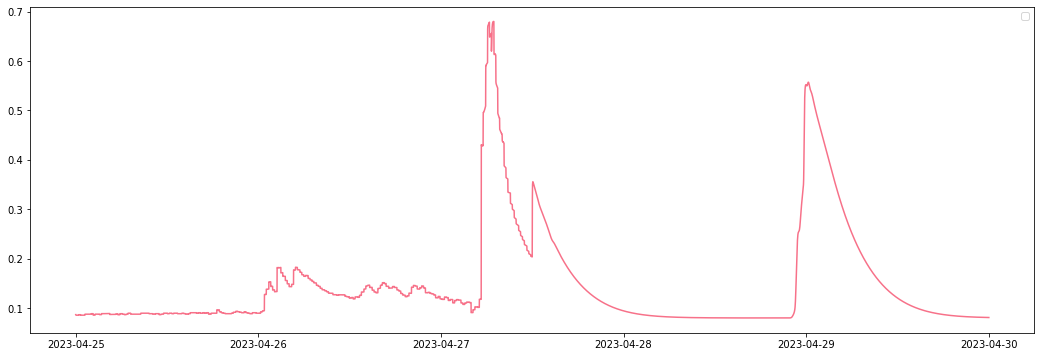

In [269]:
#Q_uk.to_csv('Q_uk.csv')

fig, ax = plt.subplots(figsize=(18, 6))
#bridge_2.plot(ax=ax, c='r', label='measurement')
ax.plot(result['J_WLR16_32ND'])
plt.legend()


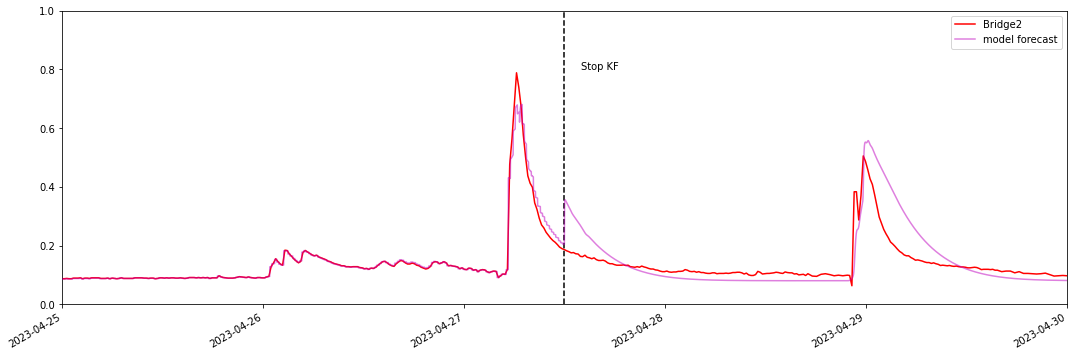

In [270]:
site_junction_name = 'J_WLR16_32ND'
site_junction_index = 13
fig, ax = plt.subplots(figsize=(18, 6))
bridge_2.plot(ax=ax, c='r', label='measurement')

result[site_junction_name].plot(ax=ax, label='model forecast', c='m', alpha=0.5, zorder=5)
plt.xlim('20230425 00:00:00', '20230430 00:00:00')
plt.ylim(0, 1.0)
plt.axvline('20230427 12:00:00', linestyle='--', c='k')
plt.text('20230427 014:00:00', 0.8, 'Stop KF')
plt.legend()

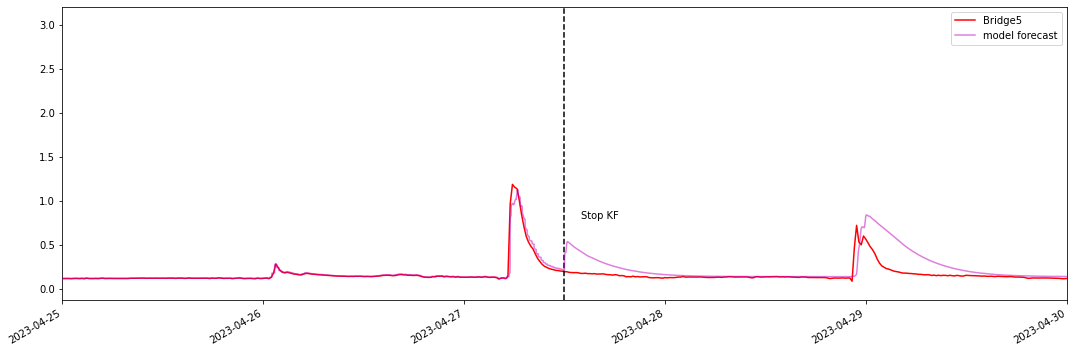

In [271]:
site_junction_name = 'J_WLR18_COMB_HEMP'
site_junction_index = 14
fig, ax = plt.subplots(figsize=(18, 6))
bridge_5.plot(ax=ax, c='r', label='measurement')

result[site_junction_name].plot(ax=ax, label='model forecast', c='m', alpha=0.5, zorder=5 )
plt.xlim('20230425 00:00:00', '20230430 00:00:00')

plt.axvline('20230427 12:00:00', linestyle='--', c='k')
plt.text('20230427 14:00:00', 0.8, 'Stop KF')
plt.legend()

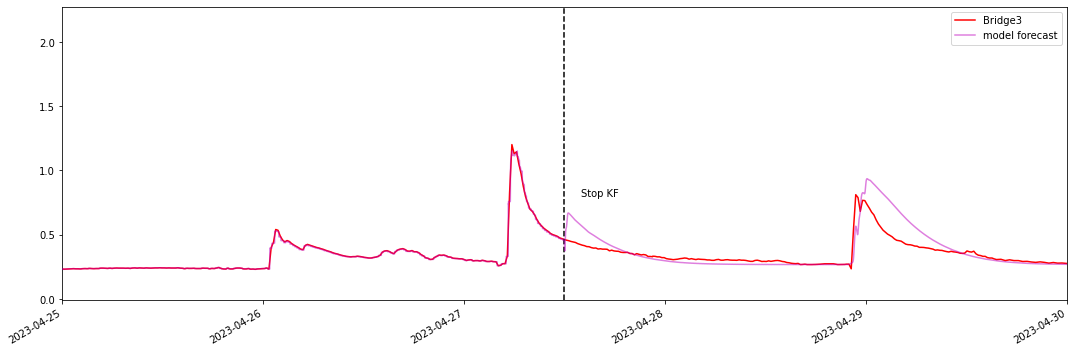

In [272]:
site_junction_name ='J_WLR19_23RD' 
site_junction_index = 15
fig, ax = plt.subplots(figsize=(18, 6))
bridge_3.plot(ax=ax, c='r', label='measurement')

result[site_junction_name].plot(ax=ax, label='model forecast', c='m', alpha=0.5, zorder=5 )
plt.xlim('20230425 00:00:00', '20230430 00:00:00')

plt.axvline('20230427 12:00:00', linestyle='--', c='k')
plt.text('20230427 14:00:00', 0.8, 'Stop KF')
plt.legend()

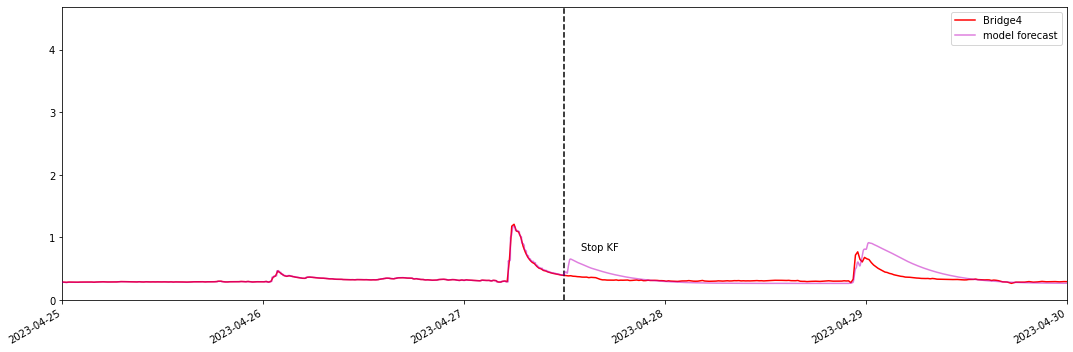

In [273]:
site_junction_name = 'J_WLR20_TRINITY'
site_junction_index = 16
fig, ax = plt.subplots(figsize=(18, 6))
bridge_4.plot(ax=ax, c='r', label='measurement')

result[site_junction_name].plot(ax=ax, label='model forecast', c='m', alpha=0.5, zorder=5 )
plt.xlim('20230425 00:00:00', '20230430 00:00:00')

plt.axvline('20230427 12:00:00', linestyle='--', c='k')
plt.text('20230427 14:00:00', 0.8, 'Stop KF')
plt.legend()

In [321]:
#h_j_kf = h_j.copy()

In [133]:
precip__in = forecast['precip_rate__in_per_s'].loc[start_date:end_date]

In [210]:
precip__in = forecast['precip_rate__in_per_s'].loc['20230427 4:00:00':'20230428 00:00:00']

<AxesSubplot:>

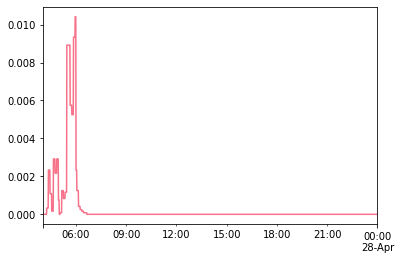

In [211]:
precip__in.plot()

In [206]:
precip__in_lcra=precip_data(LCRA,'20230427 00:00:00','20230428 00:00:00')

<AxesSubplot:xlabel='Time'>

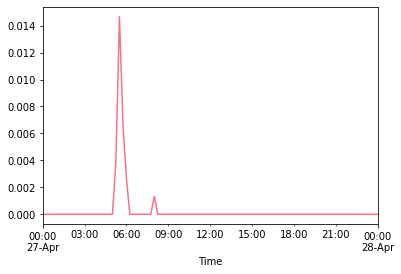

In [207]:
precip__in_lcra.plot()

In [274]:
from datetime import datetime, timedelta
#start_date='20220701'
#end_date='20220801'

start_date='20230425 00:00:00'
end_date='20230430 00:00:00'
stop_kf_time = 0

final_data={}
runoff__cms_prev=pd.DataFrame(columns=subbasins['Downstream'].unique())
P_now_subbasins=np.zeros(len(subbasins))
loss_subbasins=np.zeros(len(subbasins))
Pe_prev = 0.


#end_date='20230520'
a=datetime.strptime(end_date,'%Y%m%d %H:%M:%S')-datetime.strptime(start_date,'%Y%m%d %H:%M:%S')
delta=a.days*24*3600+a.seconds
file_name='startDate'+str(start_date)+'_endDate'+str(end_date)
print(file_name)

P_now = 0

precip__in = forecast['precip_rate__in_per_s'].loc[start_date:end_date]
if precip__in.empty != True:
    #excess_precip__in,Q_in,P_now=Model_initialization(precip__in,subbasins,P_now,decay_function=lambda x: (1 - 0.9971)*x)
    excess_precip__in,Q_in,P_now_subbasins,loss,runoff__cms_prev,Pe_prev=Model_initialization(start_date,end_date,runoff__cms_prev,precip__in,subbasins,P_now_subbasins,loss_subbasins, Pe_prev,decay_function=lambda x: (1 - 0.9971)*x)
       
        
    measurements = pd.concat([bridge_2.resample('5min').mean().interpolate(method='nearest'),
                              bridge_5.resample('5min').mean().interpolate(method='nearest'),
                          bridge_3.resample('5min').mean().interpolate(method='nearest'),
                          bridge_4.resample('5min').mean().interpolate(method='nearest')
                          ], axis=1).interpolate()
    measurements = measurements.fillna(method='backfill')
    measurements = measurements + superjunctions.loc[[13, 14, 15, 16], 'z_inv'].values
    measurements.index = measurements.index - precip__in.index.min()
    measurements.index = measurements.index.astype(int) / 1e9    
    
    superlink = SuperLink(superlinks, superjunctions,internal_links=30, mobile_elements=True)
            

    H_j = []
    h_Ik = []
    Q_uk = []
    Q_dk = []
    residuals = []
    scores = []

    # Set constant timestep (in seconds)

    # Add constant baseflow
    baseflow = 0.35e-3  * np.ones(superlink._h_Ik.size)

    # Create simulation context manager
    with Simulation(superlink, Q_in=Q_in, Qcov=Qcov, Rcov=Rcov,
                C=C_kal, H=H_kal, interpolation_method='nearest') as simulation:
        simulation.model.load_state(final_data)
        # While simulation time has not expired...
        simulation.t_end=delta
        while simulation.t <= simulation.t_end:
            # Step model forward in time
            simulation.step(dt=dt, num_iter=8, Q_Ik=baseflow)
            # Get measured value
            cond = simulation.t < stop_kf_time
            if cond:
                next_measurement = interpolate_sample(simulation.t,
                                                  measurements.index.values,
                                                  measurements.values,
                                                  method=0)
                # Apply Kalman filter with measured value
                H = H_kal
                C = C_kal
                Z_next = next_measurement
                P_x_k_k = simulation.P_x_k_k
                A_1, A_2, b = simulation.model._semi_implicit_system(_dt=dt)
                I = np.eye(A_1.shape[0])
                y_k1_k = b
                A_1_inv = np.linalg.inv(A_1)
                H_1 = H @ A_1_inv
                 
                residual = (Z_next - H_1 @ y_k1_k)
                residuals.append(residual)



                cond = residual**2 > 0.5


                if (cond).any():
                    H_mod = H[~cond]
                    H_1 = H_mod @ A_1_inv
                    Rcov_mod = Rcov[~cond][:, ~cond]
                    Z_next = Z_next[~cond]
                else:
                    H_mod = H
                    Rcov_mod = Rcov
                
                P_y_k1_k = A_2 @ P_x_k_k @ A_2.T + C @ Qcov @ C.T
                L_y_k1 = P_y_k1_k @ H_1.T @ np.linalg.inv((H_1 @ P_y_k1_k @ H_1.T) + Rcov_mod)
                P_y_k1_k1 = (I - L_y_k1 @ H_1) @ P_y_k1_k
                b_hat = y_k1_k + L_y_k1 @ (Z_next - H_1 @ y_k1_k)
                P_x_k1_k1 = A_1_inv @ P_y_k1_k1 @ A_1_inv.T
                #if score < 1e-7:
                simulation.P_x_k_k = P_x_k1_k1
                simulation.model.b = b_hat
                simulation.model.iter_count -= 1
                simulation.model.t -= dt
                simulation.model._solve_step(dt=dt)

            #simulation.kalman_filter(next_measurement, dt=dt)
            simulation.model.reposition_junctions()
            # Print progress bar
            simulation.print_progress()
            # Save states
            H_j.append(simulation.model.H_j.copy())
            h_Ik.append(simulation.model.h_Ik.copy())
            Q_uk.append(simulation.model.Q_uk.copy())
            Q_dk.append(simulation.model.Q_dk.copy())

    time_index = pd.date_range(start=excess_precip__in.index.min(), 
                                       periods=len(H_j), 
                                       freq=f'{dt}s')

    # Convert saved states to dataframes
    H_j = pd.DataFrame(np.vstack(H_j), index=time_index, columns=superjunctions['name'])
    h_Ik = pd.DataFrame(np.vstack(h_Ik), index=time_index)
    Q_uk = pd.DataFrame(np.vstack(Q_uk), index=time_index, columns=superlinks['name'])
    Q_dk = pd.DataFrame(np.vstack(Q_dk), index=time_index, columns=superlinks['name'])

    # Compute depth
    h_j = H_j - simulation.model._z_inv_j
    final_data=simulation.model.states

    final_data['t']=0
    

startDate20230425 00:00:00_endDate20230430 00:00:00
runoff__cms_now 2023-04-25 00:00:00+00:00    0.000000e+00
2023-04-25 00:00:30+00:00    0.000000e+00
2023-04-25 00:01:00+00:00    0.000000e+00
2023-04-25 00:01:30+00:00    0.000000e+00
2023-04-25 00:02:00+00:00    0.000000e+00
                                 ...     
2023-04-30 01:59:30+00:00    1.552185e-09
2023-04-30 02:00:00+00:00    9.304084e-10
2023-04-30 02:00:30+00:00    4.647534e-10
2023-04-30 02:01:00+00:00    1.547678e-10
2023-04-30 02:01:30+00:00    0.000000e+00
Freq: 30S, Length: 14644, dtype: float64
runoff__cms_prev 2023-04-30 00:00:00+00:00    6.040403e-05
2023-04-30 00:00:30+00:00    6.022885e-05
2023-04-30 00:01:00+00:00    6.004840e-05
2023-04-30 00:01:30+00:00    5.986269e-05
2023-04-30 00:02:00+00:00    5.967173e-05
                                 ...     
2023-04-30 01:59:30+00:00    1.552185e-09
2023-04-30 02:00:00+00:00    9.304084e-10
2023-04-30 02:00:30+00:00    4.647534e-10
2023-04-30 02:01:00+00:00    1.547

# J_WLR16_32ND

In [323]:
s_1 = pd.read_csv('../20230612/bridge2_classification.csv', index_col=[0],converters={'0':pd.to_datetime})
s_1.index=pd.to_datetime(s_1.index)
p_1=s_1.loc[s_1['class'],'Bridge2']
n_1=s_1.loc[~s_1['class'],'Bridge2']

s_2 = pd.read_csv('../20230612/bridge5_classification.csv', index_col=[0],converters={'0':pd.to_datetime})
s_2.index=pd.to_datetime(s_2.index)
p_2=s_2.loc[s_2['class'],'Bridge5']
n_2=s_2.loc[~s_2['class'],'Bridge5']

s_3 = pd.read_csv('../20230612/bridge3_classification.csv', index_col=[0],converters={'0':pd.to_datetime})
s_3.index=pd.to_datetime(s_3.index)
p_3=s_3.loc[s_3['class'],'Bridge3']
n_3=s_3.loc[~s_3['class'],'Bridge3']

s_4 = pd.read_csv('../20230612/bridge4_classification.csv', index_col=[0],converters={'0':pd.to_datetime})
s_4.index=pd.to_datetime(s_4.index)
p_4=s_4.loc[s_4['class'],'Bridge4']
n_4=s_4.loc[~s_4['class'],'Bridge4']

In [276]:
site_junction_name = 'J_WLR16_32ND'
site_junction_index = 13

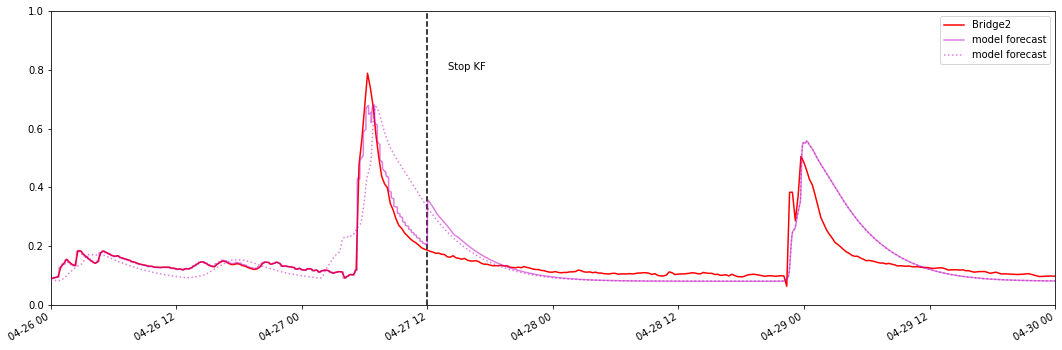

In [277]:
fig, ax = plt.subplots(figsize=(18, 6))
bridge_2.plot(ax=ax, c='r', label='measurement')
#result.loc[:'20230513 11:00:00', site_junction_name].plot(ax=ax, label='model kf', c='b')
#h_j_kf.loc['20230513 11:00:00':, site_junction_name].plot(ax=ax, label='model kf forecast', c='c')

result[site_junction_name].plot(ax=ax, label='model forecast', c='m', alpha=0.5, zorder=5 )

h_j[site_junction_name].plot(ax=ax, label='model forecast', c='m', alpha=0.5, zorder=5, linestyle=':')
plt.xlim('20230426 0:00:00','20230430 0:00:00')
plt.ylim(0, 1)
plt.axvline('20230427 12:00:00', linestyle='--', c='k')
plt.text('20230427 14:00:00', 0.8, 'Stop KF')
plt.legend()